# Background

As an AI Development Intern at the CSF, you will be tasked with
developing pipelines.

# Assessment

Please answer the following questions in a jupyter notebook. You should
only spend about two hours on these questions. If you want to spend more
you can. If you\'ve run out of time, please describe thoroughly what
remains to be done and how you would accomplish it.

## Jupyter Notebook to Processing Pipeline

Given a jupyter notebook that has a functioning implementation of a
machine learning model that identifies unique individuals out of a crowd
through gait analysis, how would you translate that notebook to a piece
of software that can be used to apply the model to any arbitrary images
or videos provided.

### **Answer**:

We are given a functioning model that can identify unique individuals by gait analysis. 
Before translating the software, I would first identify what the goal or purpose of the user. If the goal is to continue identifying individuals by gait, then nothing needs to be done as the new arbitrary images and videos can simply be fed into the functioning model.
If the goal is different, then these are the steps I would take to apply the model to other images/videos:
1. Identify the goal of the user and change the code to accept the proper image or video files types. If needed, normalize or standardize the new images/videos so they are compatible inputs with the model.
2. Change the output layer to match our task. 
3. Run the functioning model on the new files. Adjust the model and train on the new data until a desired score is reached. This may involve adjusting weights, adding/subtracting layers, and creating new training and validation sets. This will be the new translated model for the new data.
Depending on how different the goal is from what the original model was good at, the number of translations/adjustments will change. For example, if we wanted to identify sheep by gait, the original model may already output a decent score by training on a small data set of sheep images.

## Demo

Write a toy implementation of whatever machine learning concept you
would like in order to demonstrate your skills. This doesn\'t need to be
in the notebook if you want to use something other than python.

If you don't have an idea for a concept you would like to show off, here's an idea:

- Create a notebook or application that processes the images it receives from your computer camera.
- Have it classify something. Could be a human, a dog, a pencil, etc.
- Have it identify something specific to the classification. Could be you, your dog, your favorite pencil.

### **Answer**:

I will be building a model that classifies chess pieces from images using Keras. The dataset is from Kaggle: https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset. 

Please download the dataset to your local computer (too large for Github).

Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Create training, validation, and test sets from our dataset. 
Replace dataset file path accordingly.

In [20]:
image_size = (150, 150)
batch = 32

train = keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/ChessClassifier/Chessman-image-dataset/Chess", 
                                                         validation_split = 0.2,
                                                         subset = "training",
                                                         seed = 42,
                                                         image_size = image_size,
                                                         batch_size = batch,
                                                         label_mode = "categorical")


Found 552 files belonging to 6 classes.
Using 442 files for training.


In [21]:
validation = keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/ChessClassifier/Chessman-image-dataset/Chess",
                                                              validation_split = 0.2,
                                                              subset = "validation",
                                                              seed = 42,
                                                              image_size = image_size,
                                                              batch_size = batch,
                                                              label_mode = "categorical")

Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [22]:
''' test = keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/ChessClassifier/Chessman-image-dataset/Chess",
                                                                seed = 42,
                                                                image_size = image_size,
                                                                batch_size = batch,
                                                                label_mode = "categorical",
                                                                shuffle = False)
                                                                '''

' test = keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/ChessClassifier/Chessman-image-dataset/Chess",\n                                                                seed = 42,\n                                                                image_size = image_size,\n                                                                batch_size = batch,\n                                                                label_mode = "categorical",\n                                                                shuffle = False)\n                                                                '

Create the model
*   Set an L2 regularizer to prevent overfitting.
*   Use Sequential() to add layers sequentially
*   Create the input layer where each image is 150x150 px and RGB
*   Add augmentations to catch image variations and create a more robust model
*   Add 2D convolutional layers
*   Use max pooling for condense data and prevent overfitting
*   Drop a percentage of nodes to prevent overfitting
*   Create a dense layer that outputs a probability function of what the image could be (between 6 chess pieces)




In [9]:
reg = keras.regularizers.l2(0.1)

model = Sequential()
model.add(Input(shape=(150, 150, 3)))

model.add(layers.RandomRotation(factor=(-0.1, 0.2)))
model.add(layers.RandomFlip('horizontal'))
model.add(layers.RandomZoom(0.2))
model.add(layers.RandomBrightness(0.2))

model.add(Conv2D(16, (3,3), 1, activation="relu", padding = 'same', kernel_regularizer=reg))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu", padding = 'same', kernel_regularizer=reg))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), 1, activation="relu", padding = 'same', kernel_regularizer=reg))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Dense(64, activation="relu"))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 150, 150, 3)      0         
 tion)                                                           
                                                                 
 random_flip (RandomFlip)    (None, 150, 150, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 150, 150, 3)       0         
                                                                 
 random_brightness (RandomBr  (None, 150, 150, 3)      0         
 ightness)                                                       
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0

Compile the model and fit

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
epochs = 20
fitted_model = model.fit(train, epochs=epochs, validation_data=validation)

Epoch 1/20
14/14 [==============================] - 21s 1s/step - loss: 5.9845 - accuracy: 0.1991 - val_loss: 5.3998 - val_accuracy: 0.1818
Epoch 2/20
14/14 [==============================] - 20s 1s/step - loss: 4.9493 - accuracy: 0.2149 - val_loss: 4.5514 - val_accuracy: 0.2182
Epoch 3/20
14/14 [==============================] - 20s 1s/step - loss: 4.2590 - accuracy: 0.2262 - val_loss: 3.9558 - val_accuracy: 0.1818
Epoch 4/20
14/14 [==============================] - 20s 1s/step - loss: 3.7180 - accuracy: 0.2036 - val_loss: 3.4879 - val_accuracy: 0.1909
Epoch 5/20
14/14 [==============================] - 20s 1s/step - loss: 3.3342 - accuracy: 0.2172 - val_loss: 3.1908 - val_accuracy: 0.2273
Epoch 6/20
14/14 [==============================] - 20s 1s/step - loss: 3.0520 - accuracy: 0.2398 - val_loss: 2.9671 - val_accuracy: 0.2091
Epoch 7/20
14/14 [==============================] - 24s 2s/step - loss: 2.8490 - accuracy: 0.2376 - val_loss: 2.8097 - val_accuracy: 0.2000
Epoch 8/20
14/14 [==

Visualize the model's accuracy performance

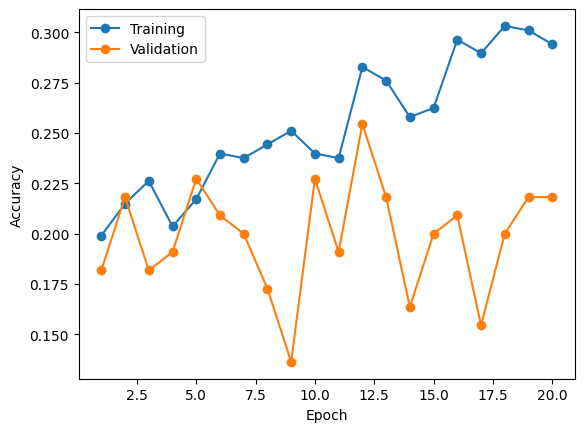

In [16]:
epochs_range = [i + 1 for i in range(epochs)]
plt.plot(epochs_range, fitted_model.history["accuracy"], "-o", label="Training")
plt.plot(epochs_range, fitted_model.history["val_accuracy"], "-o", label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()